In [1]:
import pandas_datareader as pdr 
df = pdr.get_data_yahoo('AAPL')
df1 = df[df['Volume']>0]

In [2]:
data_source = r'C:\Users\user\Desktop\Grad\PY Modules\AAPL.xlsx'
df1.to_excel(data_source)

In [20]:
import pandas as pd 
import numpy as np
df = pd.read_excel(r'C:\Users\user\Desktop\Grad\PY Modules\AAPL.xlsx')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-06-29,126.470001,124.480003,125.459999,124.529999,49161400,114.767921
1,2015-06-30,126.120003,124.860001,125.570000,125.430000,44370700,115.597382
2,2015-07-01,126.940002,125.989998,126.900002,126.599998,30238800,116.675667
3,2015-07-02,126.690002,125.769997,126.430000,126.440002,27211000,116.528198
4,2015-07-06,126.230003,124.849998,124.940002,126.000000,28060400,116.122704


In [21]:
class Strategy:
    def __init__(self): 
        self.t_name =  t_name 
        self.short_win = short_win
        self.long_win = long_win
        self.cond = df.index > self.long_win
        self.trade_price = df['Open']
        self.close = df['Adj Close']
        
    def smav(self): 
        self.smav = np.where(Strategy().cond, Strategy().close.rolling(window =Strategy().short_win).mean(), 0)
        return self.smav
    
    def lmav(self): 
        self.lmav = np.where(Strategy().cond, Strategy().close.rolling(window =Strategy().long_win).mean(), 0)
        return self.lmav
    
    def trend_day(self): 
        self.trend_day = np.where(Strategy().lmav() > Strategy().smav(), 1, 
                            np.where(Strategy().lmav() < Strategy().smav(),-1,0))
        return self.trend_day
    
    def prev_trend_day (self):
        self.prev_trend_day = np.where(Strategy().cond, np.roll(Strategy().trend_day(), 1), 0)
        return self.prev_trend_day 
    def diff_trend_day (self): 
        self.diff_trend_day = Strategy().trend_day() + Strategy().prev_trend_day()
        return self.diff_trend_day
     
                             
                             
#global variable 
t_name = 'mav'
short_win = 5
long_win = 20

s= Strategy()

df ['smav'] = s.smav()
df ['lmav'] = s.lmav()
df ['trend_day'] = s.trend_day()
df['prev_trend_day'] = s.prev_trend_day()
df['diff_trend_day'] = s.diff_trend_day ()

df[90:100]
                             

,Date,High,Low,Open,Close,Volume,Adj Close,smav,lmav,trend_day,prev_trend_day,diff_trend_day
90,2015-11-04,123.820000,121.620003,123.129997,122.000000,44886100,112.945198,112.163840,106.781355,-1,-1,-2
91,2015-11-05,122.690002,120.180000,121.849998,120.919998,39552700,112.424530,112.331885,107.333934,-1,-1,-2
92,2015-11-06,121.809998,120.620003,121.110001,121.059998,33042300,112.554688,112.716673,107.771744,-1,-1,-2
93,2015-11-09,121.809998,120.050003,120.959999,120.570000,33871400,112.099144,112.699289,108.210846,-1,-1,-2
94,2015-11-10,118.070000,116.059998,116.900002,116.769997,59127900,108.566086,111.717929,108.464502,-1,-1,-2
95,2015-11-11,117.419998,115.209999,116.370003,116.110001,45218000,107.952477,110.719385,108.760613,-1,-1,-2
96,2015-11-12,116.820000,115.650002,116.260002,115.720001,32525600,107.589859,109.752451,108.962216,-1,-1,-2
97,2015-11-13,115.570000,112.269997,115.199997,112.339996,45812400,104.447342,108.130981,109.044651,1,-1,0
98,2015-11-16,114.239998,111.000000,111.379997,114.180000,38106700,106.158073,106.942767,109.180682,1,1,2
99,2015-11-17,115.050003,113.320000,114.919998,113.690002,27616900,105.702499,106.370050,109.199506,1,1,2


In [22]:
class Signal:
    def __init__(self):
        pass
    def trade_signal(self):
        self.trade_signal = np.where(Strategy().diff_trend_day() ==0, Strategy().trend_day(), 0)
        return self.trade_signal 
    def order (self): 
        self.order = np.where(Strategy().cond, np.roll(Signal().trade_signal(), 1), 0)
        return self.order 
    
    
    
ts = Signal()
    
df['trade_signal'] =  ts.trade_signal()
df['order'] = ts.order()
    
df[90:100]

,Date,High,Low,Open,Close,Volume,Adj Close,smav,lmav,trend_day,prev_trend_day,diff_trend_day,trade_signal,order
90,2015-11-04,123.820000,121.620003,123.129997,122.000000,44886100,112.945198,112.163840,106.781355,-1,-1,-2,0,0
91,2015-11-05,122.690002,120.180000,121.849998,120.919998,39552700,112.424530,112.331885,107.333934,-1,-1,-2,0,0
92,2015-11-06,121.809998,120.620003,121.110001,121.059998,33042300,112.554688,112.716673,107.771744,-1,-1,-2,0,0
93,2015-11-09,121.809998,120.050003,120.959999,120.570000,33871400,112.099144,112.699289,108.210846,-1,-1,-2,0,0
94,2015-11-10,118.070000,116.059998,116.900002,116.769997,59127900,108.566086,111.717929,108.464502,-1,-1,-2,0,0
95,2015-11-11,117.419998,115.209999,116.370003,116.110001,45218000,107.952477,110.719385,108.760613,-1,-1,-2,0,0
96,2015-11-12,116.820000,115.650002,116.260002,115.720001,32525600,107.589859,109.752451,108.962216,-1,-1,-2,0,0
97,2015-11-13,115.570000,112.269997,115.199997,112.339996,45812400,104.447342,108.130981,109.044651,1,-1,0,1,0
98,2015-11-16,114.239998,111.000000,111.379997,114.180000,38106700,106.158073,106.942767,109.180682,1,1,2,0,1
99,2015-11-17,115.050003,113.320000,114.919998,113.690002,27616900,105.702499,106.370050,109.199506,1,1,2,0,0


In [23]:
class Portfolio:
    def __init__(self):
        self.lot_size_short = 1
        self.lot_size_long = 1
        self.contract_size = 1
        self.initial_cash = 10000
        self.short_amt = (1)* np.where (Signal().order()== -1, self.lot_size_short*
                                        self.contract_size*Strategy().trade_price, 0)
        self.long_amt = (-1)* np.where (Signal().order()==1, self.lot_size_long*
                                        self.contract_size*Strategy().trade_price, 0)
        
    def cash_delta(self): 
        self.cash_delta = Portfolio().long_amt + Portfolio().short_amt 
        return self.cash_delta
    def end_bal(self): 
        self.end_bal = Portfolio().initial_cash + Portfolio().cash_delta().cumsum()
        return self.end_bal
    def end_pos(self): 
        self.end_pos = Signal().order().cumsum()
        return self.end_pos 
    
              
p = Portfolio()
df['long_amt'] = p.long_amt
df['short_amt'] = p.short_amt
df['cash_delta'] = p.cash_delta()
df['end_bal'] = p.end_bal()
df['end_pos'] =  p.end_pos ()

df[90:100]

,Date,High,Low,Open,Close,Volume,Adj Close,smav,lmav,trend_day,prev_trend_day,diff_trend_day,trade_signal,order,long_amt,short_amt,cash_delta,end_bal,end_pos
90,2015-11-04,123.820000,121.620003,123.129997,122.000000,44886100,112.945198,112.163840,106.781355,-1,-1,-2,0,0,-0.000000,0.0,0.000000,10121.510002,-1
91,2015-11-05,122.690002,120.180000,121.849998,120.919998,39552700,112.424530,112.331885,107.333934,-1,-1,-2,0,0,-0.000000,0.0,0.000000,10121.510002,-1
92,2015-11-06,121.809998,120.620003,121.110001,121.059998,33042300,112.554688,112.716673,107.771744,-1,-1,-2,0,0,-0.000000,0.0,0.000000,10121.510002,-1
93,2015-11-09,121.809998,120.050003,120.959999,120.570000,33871400,112.099144,112.699289,108.210846,-1,-1,-2,0,0,-0.000000,0.0,0.000000,10121.510002,-1
94,2015-11-10,118.070000,116.059998,116.900002,116.769997,59127900,108.566086,111.717929,108.464502,-1,-1,-2,0,0,-0.000000,0.0,0.000000,10121.510002,-1
95,2015-11-11,117.419998,115.209999,116.370003,116.110001,45218000,107.952477,110.719385,108.760613,-1,-1,-2,0,0,-0.000000,0.0,0.000000,10121.510002,-1
96,2015-11-12,116.820000,115.650002,116.260002,115.720001,32525600,107.589859,109.752451,108.962216,-1,-1,-2,0,0,-0.000000,0.0,0.000000,10121.510002,-1
97,2015-11-13,115.570000,112.269997,115.199997,112.339996,45812400,104.447342,108.130981,109.044651,1,-1,0,1,0,-0.000000,0.0,0.000000,10121.510002,-1
98,2015-11-16,114.239998,111.000000,111.379997,114.180000,38106700,106.158073,106.942767,109.180682,1,1,2,0,1,-111.379997,0.0,-111.379997,10010.130005,0
99,2015-11-17,115.050003,113.320000,114.919998,113.690002,27616900,105.702499,106.370050,109.199506,1,1,2,0,0,-0.000000,0.0,0.000000,10010.130005,0


In [24]:
df['pnl'] = df['end_bal'] + (Portfolio().end_pos() * Strategy().trade_price*Portfolio().contract_size)
df[90:100]

,Date,High,Low,Open,Close,Volume,Adj Close,smav,lmav,trend_day,prev_trend_day,diff_trend_day,trade_signal,order,long_amt,short_amt,cash_delta,end_bal,end_pos,pnl
90,2015-11-04,123.820000,121.620003,123.129997,122.000000,44886100,112.945198,112.163840,106.781355,-1,-1,-2,0,0,-0.000000,0.0,0.000000,10121.510002,-1,9998.380005
91,2015-11-05,122.690002,120.180000,121.849998,120.919998,39552700,112.424530,112.331885,107.333934,-1,-1,-2,0,0,-0.000000,0.0,0.000000,10121.510002,-1,9999.660004
92,2015-11-06,121.809998,120.620003,121.110001,121.059998,33042300,112.554688,112.716673,107.771744,-1,-1,-2,0,0,-0.000000,0.0,0.000000,10121.510002,-1,10000.400002
93,2015-11-09,121.809998,120.050003,120.959999,120.570000,33871400,112.099144,112.699289,108.210846,-1,-1,-2,0,0,-0.000000,0.0,0.000000,10121.510002,-1,10000.550003
94,2015-11-10,118.070000,116.059998,116.900002,116.769997,59127900,108.566086,111.717929,108.464502,-1,-1,-2,0,0,-0.000000,0.0,0.000000,10121.510002,-1,10004.610001
95,2015-11-11,117.419998,115.209999,116.370003,116.110001,45218000,107.952477,110.719385,108.760613,-1,-1,-2,0,0,-0.000000,0.0,0.000000,10121.510002,-1,10005.139999
96,2015-11-12,116.820000,115.650002,116.260002,115.720001,32525600,107.589859,109.752451,108.962216,-1,-1,-2,0,0,-0.000000,0.0,0.000000,10121.510002,-1,10005.250000
97,2015-11-13,115.570000,112.269997,115.199997,112.339996,45812400,104.447342,108.130981,109.044651,1,-1,0,1,0,-0.000000,0.0,0.000000,10121.510002,-1,10006.310005
98,2015-11-16,114.239998,111.000000,111.379997,114.180000,38106700,106.158073,106.942767,109.180682,1,1,2,0,1,-111.379997,0.0,-111.379997,10010.130005,0,10010.130005
99,2015-11-17,115.050003,113.320000,114.919998,113.690002,27616900,105.702499,106.370050,109.199506,1,1,2,0,0,-0.000000,0.0,0.000000,10010.130005,0,10010.130005


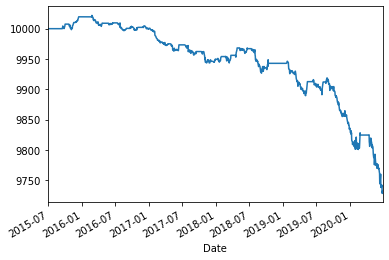

In [19]:
import matplotlib.pyplot as plt 
%matplotlib inline 
df1 = df.set_index('Date')
print_pnl = df1['pnl'].plot()
